In [1]:
from os import listdir,mkdir
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist
from Feature_phenotype_functions import common_processing_feature_phenotype_matrices


done1


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'25012018'

# Exploring the relation between binary phenotypes and shared sequences:

## prepare files:

In [33]:
#load the binary shared sequence table:

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PublicSeqAnalysis/sharingMatrix_moreThan10_434Samples'
sharingMatrix_moreThan10_434Samples=pd.read_pickle(file1)

sharingMatrix_moreThan10_434Samples.head()

,CASSLGETQYF,CASSLGYEQYF,CASSLQETQYF,CASSLGGNTEAFF,CASSSSYEQYF,CASSLSYEQYF,CASSLNTEAFF,CASSLEETQYF,CASSLGGYEQYF,CASSLRETQYF,...,CSARGTYEQYF,CASSPGQGTNYGYTF,CASSERQVYGYTF,CASSLGDRGPYEQYF,CASSQGGAYGYTF,CASSHLYEQYF,CASRGTSGTDTQYF,CASSVLAGGSYEQYF,CAISESGYGYTF,CASSIGATNEKLFF
BD438,0,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
BD690_1,1,0,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
BD836,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
BD701_1,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
BD443,1,1,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
#process sample names:
    # (1) edit sample names to match those in the phenotype files
    # (2) remove rows and columns with nan values:
    
for n,sample in enumerate(sharingMatrix_moreThan10_434Samples.index):
    print n
    if '_' in sample:
        NewName=sample.split('_')[0]
    else:
        NewName=sample
    if 'b' in NewName:
        NewName=NewName.split('b')[0]
    sharingMatrix_moreThan10_434Samples.rename(index={sample:NewName},inplace=True)
    sharingMatrix_moreThan10_434Samples.rename(columns={sample:NewName},inplace=True)
        
sharingMatrix_moreThan10_434Samples.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,CASSLGETQYF,CASSLGYEQYF,CASSLQETQYF,CASSLGGNTEAFF,CASSSSYEQYF,CASSLSYEQYF,CASSLNTEAFF,CASSLEETQYF,CASSLGGYEQYF,CASSLRETQYF,...,CSARGTYEQYF,CASSPGQGTNYGYTF,CASSERQVYGYTF,CASSLGDRGPYEQYF,CASSQGGAYGYTF,CASSHLYEQYF,CASRGTSGTDTQYF,CASSVLAGGSYEQYF,CAISESGYGYTF,CASSIGATNEKLFF
BD438,0,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
BD690,1,0,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
BD836,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
BD701,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
BD443,1,1,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [35]:
#load the phenotype table and extract the binary phenotypes:

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/fullXgroupbyBD'
fullXgroupbyBD=pd.read_pickle(file1)

fullXgroupbyBD.head()

,ConnectionID,ALT,AST,Albumin,BMI,BPdia,BPsys,Basophils %,Blood A,Blood B,...,Urea,WBC,WHR,Waist,Was breastfed,Work activity,YOB,Age,IsGenotek,FD
BD,,,,,,,,,,,,,,,,,,,,,
BD1,751.0,12.0,24.0,42.0,23.437500,83.0,115.0,0.5,NaN,NaN,...,NaN,6.9,0.850000,85.0,1.0,2.0,50.0,64.0,NaN,"[FD1769, FD722]"
BD10,808.0,22.0,18.0,44.0,24.655910,81.0,122.0,0.5,NaN,NaN,...,NaN,8.2,0.902913,93.0,1.0,4.0,69.0,45.0,NaN,"[FD2128, FD861]"
BD100,660.0,27.0,22.0,47.0,25.925926,94.0,139.0,0.6,NaN,NaN,...,NaN,5.9,0.950000,95.0,1.0,1.0,57.0,57.0,0.0,[FD542]
BD101,655.0,18.0,21.0,42.0,22.944089,84.0,130.0,0.5,0.0,1.0,...,NaN,6.6,0.844660,87.0,0.0,1.0,50.0,64.0,0.0,[FD757]
BD102,652.0,16.0,23.0,51.0,19.174580,63.0,97.0,0.8,NaN,NaN,...,NaN,8.1,0.779070,67.0,0.0,1.0,74.0,40.0,0.0,[FD540]


In [36]:
#get binary variable list:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/binaryVariableList.txt'

with open(file1,'rb') as fp:
    binaryVariableList=pickle.load(fp)


In [37]:
#generate a table containing all sequences shared among more than 10 samples, and the binary phenotypes:
binaryPhenotypes=fullXgroupbyBD[binaryVariableList]

binaryPhenotypes.head()

,Blood A,Blood B,Blood RH-,C-Section,Currently smokes,Ever smoked,Gender,Home delivery,Hormonal replacment,Irregular period,Is after birth,Is breastfeeding,Is pregnant,No period,Past breastfeeding,Regular defecation,Regular period,Taking contraceptives,Was breastfed,IsGenotek
BD,,,,,,,,,,,,,,,,,,,,
BD1,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN
BD10,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
BD100,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
BD101,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
BD102,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
sharedSequencesWithBinaryVariables=pd.merge(sharingMatrix_moreThan10_434Samples,binaryPhenotypes,how='left',
                                            left_index=True,right_index=True)

sharedSequencesWithBinaryVariables.head()

,CASSLGETQYF,CASSLGYEQYF,CASSLQETQYF,CASSLGGNTEAFF,CASSSSYEQYF,CASSLSYEQYF,CASSLNTEAFF,CASSLEETQYF,CASSLGGYEQYF,CASSLRETQYF,...,Is after birth,Is breastfeeding,Is pregnant,No period,Past breastfeeding,Regular defecation,Regular period,Taking contraceptives,Was breastfed,IsGenotek
BD438,0,0,1,1,1,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN
BD690,1,0,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN
BD836,0,1,0,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
BD701,1,1,1,1,1,1,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
BD443,1,1,1,0,1,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN


In [ ]:
print len(sharingMatrix_moreThan10_434Samples)
print len(binaryPhenotypes)
print len(sharedSequencesWithBinaryVariables)

## run Fisher test for all sequences shared by more than 10 samples, and all binary phenotypes:

In [231]:
seqList=sharingMatrix_moreThan10_434Samples.columns.values
print len(seqList)

NameError: name 'sharingMatrix_moreThan10_434Samples' is not defined

In [309]:
#number of theoretical tests:
19477*20

389540

In [ ]:
from scipy.stats import fisher_exact

countTests=0
for i,var in enumerate(binaryVariableList):
    print i,var
    groups=sharedSequencesWithBinaryVariables.groupby(var)
    for j,seq in enumerate(seqList):
#         if j<4:
            if j%5000==0:
                print 'seq number %s' %j
            df=pd.DataFrame()
            for name,group in groups:
    #             print name
                df[name]=group[seq].value_counts()
            if not df.isnull().values.any():
                if df.shape==(2,2):
                    countTests=countTests+1
                    
                    if countTests%1000==0:
                        print 'test number %s' %countTests
                
                    OR,p=fisher_exact(df, alternative='two-sided')
                    if p<0.0005:
                        nSamples=sharedSequencesWithBinaryVariables[seq].sum()
                        print p
                        result=pd.DataFrame()
                        result.loc[0,'var']=var
                        result.loc[0,'seq']=seq
                        result.loc[0,'seq #']=j
                        result.loc[0,'nSamples']=nSamples
                        result.loc[0,'OR']=OR
                        result.loc[0,'p']=p
#                         print result
                        
                        file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/FisherTestResults_moreThan10binary_binaryPhenotypes/%s_seq%s' %(var,j)
                        result.to_pickle(file1)
print countTests
                        
    

## view results:

In [280]:
FisherFolder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/FisherTestResults_moreThan10binary_binaryPhenotypes'
FisherResults=concat_summarizing_dfs(FisherFolder)

number of dfs in directory: 104
the length of df list is 104


In [240]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/FisherResults'
FisherResults.to_pickle(file1)

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/FisherResults.xlsx'
FisherResults.to_excel(file1)

In [281]:
FisherResults.sort_values(by='p').head()

,var,seq,seq #,nSamples,OR,p
0,No period,CASSDSSGSYNEQFF,118.0,109.0,0.120519,2.996085e-07
0,Currently smokes,CASSAGGNYGYTF,14650.0,12.0,25.729730,1.638063e-06
0,Regular period,CSARVGDTEAFF,5738.0,21.0,10.422018,3.571159e-06
0,No period,CASSDSSGSTDTQYF,72.0,131.0,0.239035,2.017528e-05
0,No period,CSADRGNTEAFF,11214.0,15.0,11.549296,2.622090e-05


### generate df with minimal p-value per nSamples:

In [284]:
#this minimal p value doesn't include cases in which the relevant sequence is divided 0-all 
#between phenotype groups, so there might be even lower p-value

from scipy.stats import fisher_exact
df=pd.DataFrame()
n=0
for i in range(11,279):
    OR,p=fisher_exact([[1,i-1],[i-1,1]], alternative='two-sided')
    df.loc[n,'nSamples']=i
    df.loc[n,'maximalP_FisherTwoSided']=p
    n=n+1

df.head()

,nSamples,maximalP_FisherTwoSided
0,11.0,0.000346
1,12.0,0.000107
2,13.0,0.000033
3,14.0,0.000010
4,15.0,0.000003


In [285]:
FisherWithMinP=pd.merge(FisherResults,df,how='left',left_on='nSamples',right_on='nSamples')
FisherWithMinP['lower than minimal']=np.where(FisherWithMinP['p']<FisherWithMinP['maximalP_FisherTwoSided'],1,0)
FisherWithMinP.sort_values(by='p')

,var,seq,seq #,nSamples,OR,p,maximalP_FisherTwoSided,lower than minimal
35,No period,CASSDSSGSYNEQFF,118.0,109.0,0.120519,2.996085e-07,1.045121e-60,0
11,Currently smokes,CASSAGGNYGYTF,14650.0,12.0,25.729730,1.638063e-06,1.072423e-04,1
102,Regular period,CSARVGDTEAFF,5738.0,21.0,10.422018,3.571159e-06,1.642335e-09,0
3,No period,CASSDSSGSTDTQYF,72.0,131.0,0.239035,2.017528e-05,9.405113e-74,0
40,No period,CSADRGNTEAFF,11214.0,15.0,11.549296,2.622090e-05,2.913920e-06,0
100,Taking contraceptives,CASSLRETEAFF,17129.0,11.0,16.763158,2.752650e-05,3.458873e-04,1
75,Regular period,CASSPDRSSYEQYF,4376.0,25.0,6.318783,2.860542e-05,9.904232e-12,0
21,Currently smokes,CASSAQGGYEQYF,18635.0,11.0,16.394737,3.137135e-05,3.458873e-04,1
62,Past breastfeeding,CASSEAGGSYNEQFF,729.0,57.0,0.184219,4.048403e-05,4.197190e-30,0
45,Past breastfeeding,CASSRQVQETQYF,7283.0,19.0,8.521739,4.414349e-05,2.048365e-08,0


### check corrected p-values:

#### add column to indicate significant p's according to bonferroni correction:

In [286]:
FisherWithMinP['sig. by bonferroni correction']=np.where(FisherWithMinP['p']<correct_p,1,0)
FisherWithMinP.head()

NameError: name 'correct_p' is not defined

#### add columns to indicate significant p's after BH FDR correction with FDR=0.005:

In [289]:
from statsmodels.sandbox.stats.multicomp import fdrcorrection0
pList=FisherWithMinP['p']
b,p=fdrcorrection0(pList, alpha=0.005)
sigList=[1 if x else 0 for x in b]
FisherWithMinP['sig. by FDR=0.005']=sigList
FisherWithMinP.head()

,var,seq,seq #,nSamples,OR,p,maximalP_FisherTwoSided,lower than minimal,sig. by FDR=0.005
0,Taking contraceptives,CASSLAGGETQYF,175.0,95.0,3.594030,0.000161,1.989914e-52,0,1
1,Currently smokes,CASSFGQGTEAFF,4905.0,23.0,6.859951,0.000374,1.287434e-10,0,1
2,Regular defecation,CASSRGLAGEETQYF,17223.0,11.0,0.055336,0.000305,3.458873e-04,1,1
3,No period,CASSDSSGSTDTQYF,72.0,131.0,0.239035,0.000020,9.405113e-74,0,1
4,Taking contraceptives,CASSWTGGYGYTF,18202.0,11.0,11.169231,0.000369,3.458873e-04,0,1


In [293]:
from statsmodels.sandbox.stats.multicomp import fdrcorrection0
pList=FisherWithMinP['p']
b,p=fdrcorrection0(pList, alpha=0.0005)
sigList=[1 if x else 0 for x in b]
FisherWithMinP['sig. by FDR=0.0005']=sigList
FisherWithMinP

,var,seq,seq #,nSamples,OR,p,maximalP_FisherTwoSided,lower than minimal,sig. by FDR=0.005,sig. by FDR=0.0001,sig. by FDR=0.0005
0,Taking contraceptives,CASSLAGGETQYF,175.0,95.0,3.594030,0.000161,1.989914e-52,0,1,0,1
1,Currently smokes,CASSFGQGTEAFF,4905.0,23.0,6.859951,0.000374,1.287434e-10,0,1,0,1
2,Regular defecation,CASSRGLAGEETQYF,17223.0,11.0,0.055336,0.000305,3.458873e-04,1,1,0,1
3,No period,CASSDSSGSTDTQYF,72.0,131.0,0.239035,0.000020,9.405113e-74,0,1,0,1
4,Taking contraceptives,CASSWTGGYGYTF,18202.0,11.0,11.169231,0.000369,3.458873e-04,0,1,0,1
5,Taking contraceptives,CASSVGDGYTF,18985.0,11.0,11.169231,0.000369,3.458873e-04,0,1,0,1
6,Home delivery,CASSLDVTDTQYF,12816.0,14.0,52.500000,0.000327,9.821371e-06,0,1,0,1
7,Is breastfeeding,CASSLGLAGGSSYNEQFF,9741.0,16.0,26.200000,0.000156,8.551269e-07,0,1,0,1
8,C-Section,CATRTGNTGELFF,19229.0,11.0,15.565217,0.000259,3.458873e-04,1,1,0,1
9,Regular defecation,CASSLAGTAYGYTF,5955.0,21.0,0.144000,0.000292,1.642335e-09,0,1,0,1


#### add column indicating number of positive samples for variable:

In [39]:
nSamplesDF=pd.DataFrame()
for n,var in enumerate(binaryVariableList):        
#     print n,var
    nSamplesDF.loc[n,'var']=var
    if var=='Is pregnant':
        nSamplesDF.loc[n,'nSamples for variable']=0
    else:
        nSamplesDF.loc[n,'nSamples for variable']=sharedSequencesWithBinaryVariables.groupby(var).count().iloc[1,0]
nSamplesDF.head()   

,var,nSamples for variable
0,Blood A,71.0
1,Blood B,43.0
2,Blood RH-,32.0
3,C-Section,28.0
4,Currently smokes,45.0


In [299]:
FisherFull=pd.merge(FisherWithMinP,nSamplesDF,how='left',left_on='var',right_on='var')
FisherFull

,var,seq,seq #,nSamples,OR,p,maximalP_FisherTwoSided,lower than minimal,sig. by FDR=0.005,sig. by FDR=0.0001,sig. by FDR=0.0005,nSamples for variable
0,Taking contraceptives,CASSLAGGETQYF,175.0,95.0,3.594030,0.000161,1.989914e-52,0,1,0,1,30.0
1,Currently smokes,CASSFGQGTEAFF,4905.0,23.0,6.859951,0.000374,1.287434e-10,0,1,0,1,30.0
2,Regular defecation,CASSRGLAGEETQYF,17223.0,11.0,0.055336,0.000305,3.458873e-04,1,1,0,1,169.0
3,No period,CASSDSSGSTDTQYF,72.0,131.0,0.239035,0.000020,9.405113e-74,0,1,0,1,50.0
4,Taking contraceptives,CASSWTGGYGYTF,18202.0,11.0,11.169231,0.000369,3.458873e-04,0,1,0,1,30.0
5,Taking contraceptives,CASSVGDGYTF,18985.0,11.0,11.169231,0.000369,3.458873e-04,0,1,0,1,30.0
6,Home delivery,CASSLDVTDTQYF,12816.0,14.0,52.500000,0.000327,9.821371e-06,0,1,0,1,NaN
7,Is breastfeeding,CASSLGLAGGSSYNEQFF,9741.0,16.0,26.200000,0.000156,8.551269e-07,0,1,0,1,7.0
8,C-Section,CATRTGNTGELFF,19229.0,11.0,15.565217,0.000259,3.458873e-04,1,1,0,1,17.0
9,Regular defecation,CASSLAGTAYGYTF,5955.0,21.0,0.144000,0.000292,1.642335e-09,0,1,0,1,169.0


#### check whether there is a seqeunce with significant correlation in more than one variable:

In [300]:
FisherFull['seq'].value_counts().head()

CASSLGGNTEAFF      4
CASSPDRSSYEQYF     2
CASSLVGAETQYF      2
CASSLGETQYF        2
CASSLGGTNTGELFF    2
Name: seq, dtype: int64

In [301]:
FisherFull['var'].value_counts()

Taking contraceptives    17
Regular period           11
Regular defecation        8
Past breastfeeding        8
Gender                    8
No period                 7
Ever smoked               7
Is after birth            6
Is breastfeeding          6
Currently smokes          5
Irregular period          4
IsGenotek                 3
Home delivery             3
Blood A                   3
Hormonal replacment       2
Blood RH-                 2
Was breastfed             2
C-Section                 2
Name: var, dtype: int64

#### save files:

In [302]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/FisherFull'
FisherFull.to_pickle(file1)

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/FisherFull.xlsx'
FisherFull.to_excel(file1)

### check contingency tables for interesting combinations of varXseq:

#### load file:

In [303]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/FisherFull'
FisherFull=pd.read_pickle(file1)

In [ ]:
meaningfulFisherResults=pd.DataFrame(columns=FisherWithMinP.columns.values)
for n in FisherWithMinP.index:

    var=FisherWithMinP.loc[n,'var']
    seq=FisherWithMinP.loc[n,'seq']
    
    if var!='Home delivery':

        groups=sharedSequencesWithBinaryVariables.groupby(var)
        df=pd.DataFrame()
        for name,group in groups:
            df[name]=group[seq].value_counts()
        if df.loc[1,1]>df.loc[0,1]:
            print var, seq
            print df
#         meaningfulFisherResults.append(FisherWithMinP.loc[n,:]) 
# meaningfulFisherResults

In [ ]:
meaningfulFisherResults=pd.DataFrame(columns=FisherWithMinP.columns.values)
meaningfulFisherResults

In [307]:
var='Currently smokes'
seq='CASSAGGNYGYTF'

groups=sharedSequencesWithBinaryVariables.groupby(var)
df=pd.DataFrame()
for name,group in groups:
    df[name]=group[seq].value_counts()
# if df.loc[1,1]>df.loc[0,1]:
#     print var, seq
#     print df

print df

   0.0  1.0
0  240   24
1    2    6


In [308]:
var='No period'
seq='CASSDSSGSYNEQFF'

groups=sharedSequencesWithBinaryVariables.groupby(var)
df=pd.DataFrame()
for name,group in groups:
    df[name]=group[seq].value_counts()
# if df.loc[1,1]>df.loc[0,1]:
#     print var, seq
#     print df

print df

   0.0  1.0
0  162   48
1   65    2


In [310]:
var='Currently smokes'
seq='CASSAQGGYEQYF'

groups=sharedSequencesWithBinaryVariables.groupby(var)
df=pd.DataFrame()
for name,group in groups:
    df[name]=group[seq].value_counts()
# if df.loc[1,1]>df.loc[0,1]:
#     print var, seq
#     print df

print df

   0.0  1.0
0  240   24
1    2    6


In [315]:
var='Regular defecation'
seq='CSARGQGYEQYF'

groups=sharedSequencesWithBinaryVariables.groupby(var)
df=pd.DataFrame()
for name,group in groups:
    df[name]=group[seq].value_counts()
# if df.loc[1,1]>df.loc[0,1]:
#     print var, seq
#     print df

print df

   0.0  1.0
0   91  168
1   11    1


In [316]:
var='Gender'
seq='CASSQDTDTQYF'

groups=sharedSequencesWithBinaryVariables.groupby(var)
df=pd.DataFrame()
for name,group in groups:
    df[name]=group[seq].value_counts()
# if df.loc[1,1]>df.loc[0,1]:
#     print var, seq
#     print df

print df

   0.0  1.0
0  140  106
1   24    2


In [317]:
var='Gender'
seq='CASSPDRSSYEQYF'

groups=sharedSequencesWithBinaryVariables.groupby(var)
df=pd.DataFrame()
for name,group in groups:
    df[name]=group[seq].value_counts()
# if df.loc[1,1]>df.loc[0,1]:
#     print var, seq
#     print df

print df

   0.0  1.0
0  147  107
1   17    1


In [324]:
var='Taking contraceptives'
seq='CASSLRTSGNEQFF'

groups=sharedSequencesWithBinaryVariables.groupby(var)
df=pd.DataFrame()
for name,group in groups:
    df[name]=group[seq].value_counts()
# if df.loc[1,1]>df.loc[0,1]:
#     print var, seq
#     print df

print df

   0.0  1.0
0  244   25
1    3    5


In [ ]:
#consider analysing adaptive cohort for gender, ethnicity, 

# compare sequence matrix distances among binary phenotypes:

### load feature distance matrix

In [3]:
PhenotypeDistFolder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Distance Matrices/BinaryPhenotypes'
phenotypeFiles = [f for f in listdir(PhenotypeDistFolder) if isfile(join(PhenotypeDistFolder, f))]
FeatureDistFolder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Distance Matrices/Features'
featureFiles = [f for f in listdir(FeatureDistFolder) if isfile(join(FeatureDistFolder, f))]

In [4]:
featureFiles

['distMat_PNP434_sharingMatrixMoreThan10100PCsUsed_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan10RA_braycurtis',
 'distMat_PNP434_sharingMatrixMoreThan11PCsUsed_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan150PCsUsed_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan1050PCsUsed_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan1100PCsUsed_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan5_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan2_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan15PCsUsed_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan1Binary_braycurtis',
 'distMat_PNP434_sharingMatrixMoreThan2RA_braycurtis',
 'distMat_PNP434_sharingMatrixMoreThan10_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan1RA_braycurtis',
 'distMat_PNP434_sharingMatrixMoreThan5RA_braycurtis',
 'distMat_PNP434_sharingMatrixMoreThan101PCsUsed_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan1Binary_euclidean',
 'distMat_PNP434_sharingMatrixMoreThan1RAlog2scale_euclidean',
 'distMat_PNP

In [44]:
print len(featureFiles)

18


In [5]:
phenotypeFiles

['distMat_PNP434_Is breastfeeding_euclidean',
 'distMat_PNP434_No period_euclidean',
 'distMat_PNP434_IsGenotek_euclidean',
 'distMat_PNP434_Irregular period_euclidean',
 'distMat_PNP434_Home delivery_euclidean',
 'distMat_PNP434_Blood B_euclidean',
 'distMat_PNP434_Ever smoked_euclidean',
 'distMat_PNP434_Blood A_euclidean',
 'distMat_PNP434_Regular defecation_euclidean',
 'distMat_PNP434_Hormonal replacment_euclidean',
 'distMat_PNP434_C-Section_euclidean',
 'distMat_PNP434_Blood RH-_euclidean',
 'distMat_PNP434_Regular period_euclidean',
 'distMat_PNP434_Taking contraceptives_euclidean',
 'distMat_PNP434_Was breastfed_euclidean',
 'distMat_PNP434_Is pregnant_euclidean',
 'distMat_PNP434_Past breastfeeding_euclidean',
 'distMat_PNP434_Currently smokes_euclidean',
 'distMat_PNP434_Is after birth_euclidean',
 'distMat_PNP434_Gender_euclidean']

In [45]:
print len(phenotypeFiles)

20


In [50]:
# I'll use 18 phenotypes (remove isPregnant and Home delivery due to low positive samples) and all 18 features
#so there are going to be 324 tests and the desired p-value 0.00015
#therefore 9999 permutation should be enought
0.05/(18*18)
# 1.0/9999

0.00015432098765432098

### load the phenotype file:

In [41]:
file6='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/fullXgroupbyBD_only434'
fullXgroupbyBD_only434=pd.read_pickle(file6)

### define the general function for comparing distances between phenotype categories:

In [7]:
from Feature_phenotype_functions import common_processing_feature_phenotype_matrices

In [57]:
##### this function was copied to the 'Feature_phenotype_functions.py' file in eclipse - 14/1/18####


def common_processing_feature_phenotype_matrices(featureDF,phenotypeDF,removeSameUser):
    x=featureDF
    y=phenotypeDF

    print 'original x array shape is %s_%s' %(x.shape[0],x.shape[1])
    print 'original y array shape is %s_%s' %(y.shape[0],y.shape[1])

    
    #remove non numeric columns and empty rows
    for column in x:    #remove nonnumeric columns
        if x[column].dtype=='object':
            x=x.drop(column,axis=1)
#             print '%s column was dropped from x' %column
    x=x.dropna(axis=(0,1),how='all') #remove empty rows
    
    for column in y:    #remove nonnumeric columns
        if y[column].dtype=='object':
            y=y.drop(column,axis=1)
#             print '%s column was dropped from y' %column
    y=y.dropna(axis=(0,1),how='all') #remove empty rows
    
    
    #make sure samples in the two matrices are identical:
    for sample in x.index:
        if sample not in y.index:
            x=x.drop(sample,axis=0)
            x=x.drop(sample,axis=1)
    for sample in y.index:
        if sample not in x.index:
            y=y.drop(sample,axis=0)
            y=y.drop(sample,axis=1)

    
    #make sure both matrices have the same order:
    x=x.sort_index(axis=0)
    x=x.sort_index(axis=1)
    y=y.sort_index(axis=0)
    y=y.sort_index(axis=1)
    
    
    
    if removeSameUser: #Remove second sample from the same user:
        print 'removing second sample from the same user...'
        removedSampleList=['BD714','BD838'] #UPDATE LIST WITH MORE SAMPLES COMING FROM AN ALREADY EXIST USER
        for removedSample in removedSampleList:
            if removedSample in x.index:
                x=x.drop(removedSample,axis=0)
#                 print 'removed from x rows'
                x=x.drop(removedSample,axis=1)
#                 print 'removed from x columns'
                y=y.drop(removedSample,axis=0)
#                 print 'removed from y rows'
                if len(y.columns.values)>1:
                    print len(y.columns.values)
                    y=y.drop(removedSample,axis=1)
                    print 'removed from y columns'
#                 print 'sample %s was removed' %removedSample
                
    print 'new x array shape is %s_%s' %(x.shape[0],x.shape[1])
    print 'new y array shape is %s_%s' %(y.shape[0],y.shape[1])
#     print x.head()
#     print y.head()
            
    return x,y

In [177]:
def compare_feature_distance_for_binary_phenotypes(feature_dist_file,phenotype,nPerm,removeSameUser,filteringList):
    
    from skbio.stats.distance import permanova
    from skbio.stats.distance import DistanceMatrix
    featureName=feature_dist_file.split('_')[-2]+'_'+feature_dist_file.split('_')[-1]
    print featureName

    #(1)load and process distance matrix files:
    print 'loading and processing distance matrix files...'
    feature_dist_mat=pd.read_pickle(feature_dist_file)
    

    x=feature_dist_mat
    y=pd.DataFrame(fullXgroupbyBD_only434[phenotype])
    
    x,y=common_processing_feature_phenotype_matrices(x,y,True)
    
    if filteringList is not None:
        for sample in x.index:
            if sample not in filteringList:
                x=x.drop(sample,axis=0)
                x=x.drop(sample,axis=1)
        for sample in y.index:
            if sample not in filteringList:
                y=y.drop(sample,axis=0)
                y=y.drop(sample,axis=1)
        
        print ' filtered matrices to include only samples in filteringList:'
        print 'new x array shape is %s_%s' %(x.shape[0],x.shape[1])
        print 'new y array shape is %s_%s' %(y.shape[0],y.shape[1])

    #(2)
    
    DM=DistanceMatrix(x,ids=x.index)
    results=permanova(DM, y, column=phenotype, permutations=nPerm)
#     print results
    p=results['p-value']
    s=results['test statistic']
#     print p
    
    permAnovaResDF=pd.DataFrame()
    permAnovaResDF.loc[0,'featureName']=featureName
    permAnovaResDF.loc[0,'phenotype']=phenotype
    permAnovaResDF.loc[0,'nPerm']=nPerm
    permAnovaResDF.loc[0,'removeSameUser']=removeSameUser
    permAnovaResDF.loc[0,'s']=s
    permAnovaResDF.loc[0,'p']=p

    file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResults/%s_%s_%s_%s' %(featureName,phenotype,nPerm,removeSameUser)
    permAnovaResDF.to_pickle(file1)
    
    print p
    print 'done'
    
#     if p<0.01:
#         fig1=plt.figure(figsize=(5,5))
    
#     weightsNegative=np.ones_like(newx)/len(newx)
#     weightsPositive=np.ones_like(newy)/len(newy)
    
#     plt.hist((newx,newy), bins=50, color=('black', 'green'), weights=[weightsNegative,weightsPositive],label=('negative','positive'), alpha=0.7)
#     plt.legend()
        
        
#         fig1=plot_corr_for_distMats(x,y,feature_name,phenotype_name)
#             file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/DistMat_correlation_plots/%s_%s' %(feature_name,phenotype_name)
#             fig1.savefig(file1,dpi=200)
        
    
    
    

    

### run all comparison set with only 999 permutations to see if all features are necessary:
conclusion: within the group of RA_braycurtis or binary_euclidean, we can take only moreThan1, moreThan10

In [66]:
nPerm=999
removeSameUser=True

FeatureDistFolder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Distance Matrices/Features'
featureFiles = [f for f in listdir(FeatureDistFolder) if isfile(join(FeatureDistFolder, f))]
phenotypeList=binaryVariableList
phenotypeList.remove('Is pregnant')
phenotypeList.remove('Home delivery')

for n,Ffile in enumerate(featureFiles):
#     if n<2:
    print n,Ffile
    feature_dist_file='%s/%s' %(FeatureDistFolder,Ffile)
    
    for n,phenotype in enumerate(phenotypeList):
#         if n<2:
        print n,phenotype
        compare_feature_distance_for_binary_phenotypes(feature_dist_file,phenotype,nPerm,removeSameUser)
        
    

0 distMat_PNP434_sharingMatrixMoreThan10100PCsUsed_euclidean
0 Blood A
sharingMatrixMoreThan10100PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 178_178
new y array shape is 178_1
0.945
done
1 Blood B
sharingMatrixMoreThan10100PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 178_178
new y array shape is 178_1
0.373
done
2 Blood RH-
sharingMatrixMoreThan10100PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 178_178
new y array shape is 178_1
0.898
done
3 C-Section
sharingMatrixMoreThan10100PCsUsed_euclidean
loading and processing distance matrix fi

0.519
done
11 No period
sharingMatrixMoreThan10RA_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.001
done
12 Past breastfeeding
sharingMatrixMoreThan10RA_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.005
done
13 Regular defecation
sharingMatrixMoreThan10RA_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 402_402
new y array shape is 402_1
0.417
done
14 Regular period
sharingMatrixMoreThan10RA_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
origin

0.528
done
4 Currently smokes
sharingMatrixMoreThan150PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 403_403
new y array shape is 403_1
0.467
done
5 Ever smoked
sharingMatrixMoreThan150PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 403_403
new y array shape is 403_1
0.01
done
6 Gender
sharingMatrixMoreThan150PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 403_403
new y array shape is 403_1
0.742
done
7 Hormonal replacment
sharingMatrixMoreThan150PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_43

0.02
done
15 Taking contraceptives
sharingMatrixMoreThan1050PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.002
done
16 Was breastfed
sharingMatrixMoreThan1050PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 341_341
new y array shape is 341_1
0.384
done
17 IsGenotek
sharingMatrixMoreThan1050PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 218_218
new y array shape is 218_1
0.462
done
5 distMat_PNP434_sharingMatrixMoreThan1100PCsUsed_euclidean
0 Blood A
sharingMatrixMoreThan1100PCsUsed_euclidean
loading and pro

0.536
done
8 Irregular period
sharingMatrixMoreThan5_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.109
done
9 Is after birth
sharingMatrixMoreThan5_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.305
done
10 Is breastfeeding
sharingMatrixMoreThan5_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.122
done
11 No period
sharingMatrixMoreThan5_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 43

removing second sample from the same user...
new x array shape is 178_178
new y array shape is 178_1
0.734
done
2 Blood RH-
sharingMatrixMoreThan15PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 178_178
new y array shape is 178_1
0.627
done
3 C-Section
sharingMatrixMoreThan15PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 389_389
new y array shape is 389_1
0.658
done
4 Currently smokes
sharingMatrixMoreThan15PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 403_403
new y array shape is 403_1
0.842
done
5 Ever smoked
sharingMatrixMoreThan15PCsUsed

0.004
done
13 Regular defecation
sharingMatrixMoreThan1Binary_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 402_402
new y array shape is 402_1
0.501
done
14 Regular period
sharingMatrixMoreThan1Binary_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.009
done
15 Taking contraceptives
sharingMatrixMoreThan1Binary_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.038
done
16 Was breastfed
sharingMatrixMoreThan1Binary_braycurtis
loading and processing distance matrix files...
original x array shap

0.009
done
7 Hormonal replacment
sharingMatrixMoreThan10_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.482
done
8 Irregular period
sharingMatrixMoreThan10_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.095
done
9 Is after birth
sharingMatrixMoreThan10_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.271
done
10 Is breastfeeding
sharingMatrixMoreThan10_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y arra

removing second sample from the same user...
new x array shape is 178_178
new y array shape is 178_1
0.768
done
1 Blood B
sharingMatrixMoreThan5RA_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 178_178
new y array shape is 178_1
0.384
done
2 Blood RH-
sharingMatrixMoreThan5RA_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 178_178
new y array shape is 178_1
0.038
done
3 C-Section
sharingMatrixMoreThan5RA_braycurtis
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 389_389
new y array shape is 389_1
0.734
done
4 Currently smokes
sharingMatrixMoreThan5RA_braycurtis
loading and p

0.006
done
12 Past breastfeeding
sharingMatrixMoreThan101PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.04
done
13 Regular defecation
sharingMatrixMoreThan101PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 402_402
new y array shape is 402_1
0.02
done
14 Regular period
sharingMatrixMoreThan101PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.011
done
15 Taking contraceptives
sharingMatrixMoreThan101PCsUsed_euclidean
loading and processing distance matrix files...
original x

0.627
done
5 Ever smoked
sharingMatrixMoreThan1RAlog2scale_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 403_403
new y array shape is 403_1
0.042
done
6 Gender
sharingMatrixMoreThan1RAlog2scale_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 403_403
new y array shape is 403_1
0.259
done
7 Hormonal replacment
sharingMatrixMoreThan1RAlog2scale_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 411_411
new y array shape is 411_1
0.612
done
8 Irregular period
sharingMatrixMoreThan1RAlog2scale_euclidean
loading and processing distance matrix files...
original x array shape 

0.012
done
16 Was breastfed
sharingMatrixMoreThan105PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 341_341
new y array shape is 341_1
0.419
done
17 IsGenotek
sharingMatrixMoreThan105PCsUsed_euclidean
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 434_1
removing second sample from the same user...
new x array shape is 218_218
new y array shape is 218_1
0.806
done


In [67]:
permAnovaFolder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResults'
permAnovaResults=concat_summarizing_dfs(permAnovaFolder)

number of dfs in directory: 326
the length of df list is 326


In [68]:
permAnovaResults.sort_values(by='p')

,featureName,phenotype,nPerm,removeSameUser,s,p
0,sharingMatrixMoreThan1RA_braycurtis,No period,999.0,True,1.069199,0.001
0,sharingMatrixMoreThan2RA_braycurtis,Gender,999.0,True,1.074743,0.001
0,sharingMatrixMoreThan10_euclidean,Taking contraceptives,999.0,True,1.356359,0.001
0,sharingMatrixMoreThan1Binary_braycurtis,Gender,999.0,True,1.057184,0.001
0,sharingMatrixMoreThan5RA_braycurtis,Gender,999.0,True,1.118266,0.001
0,sharingMatrixMoreThan10RA_braycurtis,No period,999.0,True,1.224822,0.001
0,sharingMatrixMoreThan11PCsUsed_euclidean,Taking contraceptives,999.0,True,17.251369,0.001
0,sharingMatrixMoreThan2RA_braycurtis,No period,999.0,True,1.095950,0.001
0,sharingMatrixMoreThan2_euclidean,Taking contraceptives,999.0,True,1.270024,0.001
0,sharingMatrixMoreThan5_euclidean,Taking contraceptives,999.0,True,1.311680,0.001


In [70]:
permAnovaResults[permAnovaResults['phenotype']=='Gender'].sort_values(by='p')

,featureName,phenotype,nPerm,removeSameUser,s,p
0,sharingMatrixMoreThan5RA_braycurtis,Gender,999.0,True,1.118266,0.001
0,sharingMatrixMoreThan2RA_braycurtis,Gender,999.0,True,1.074743,0.001
0,sharingMatrixMoreThan1Binary_braycurtis,Gender,999.0,True,1.057184,0.001
0,sharingMatrixMoreThan10RA_braycurtis,Gender,999.0,True,1.174398,0.001
0,sharingMatrixMoreThan1RA_braycurtis,Gender,999.0,True,1.049352,0.002
0,sharingMatrixMoreThan10_euclidean,Gender,999.0,True,1.093194,0.009
0,sharingMatrixMoreThan105PCsUsed_euclidean,Gender,999.0,True,2.154861,0.015
0,sharingMatrixMoreThan5_euclidean,Gender,999.0,True,1.053127,0.025
0,sharingMatrixMoreThan11PCsUsed_euclidean,Gender,999.0,True,4.067449,0.033
0,sharingMatrixMoreThan2_euclidean,Gender,999.0,True,1.023987,0.054


In [71]:
permAnovaResults[permAnovaResults['phenotype']=='No period'].sort_values(by='p')

,featureName,phenotype,nPerm,removeSameUser,s,p
0,sharingMatrixMoreThan5RA_braycurtis,No period,999.0,True,1.155446,0.001
0,sharingMatrixMoreThan10RA_braycurtis,No period,999.0,True,1.224822,0.001
0,sharingMatrixMoreThan1Binary_braycurtis,No period,999.0,True,1.066132,0.001
0,sharingMatrixMoreThan2RA_braycurtis,No period,999.0,True,1.095950,0.001
0,sharingMatrixMoreThan1RA_braycurtis,No period,999.0,True,1.069199,0.001
0,sharingMatrixMoreThan1050PCsUsed_euclidean,No period,999.0,True,1.640878,0.003
0,sharingMatrixMoreThan101PCsUsed_euclidean,No period,999.0,True,7.336747,0.006
0,sharingMatrixMoreThan10_euclidean,No period,999.0,True,1.092510,0.039
0,sharingMatrixMoreThan10100PCsUsed_euclidean,No period,999.0,True,1.251784,0.039
0,sharingMatrixMoreThan11PCsUsed_euclidean,No period,999.0,True,3.967784,0.048


In [72]:
permAnovaResults[permAnovaResults['phenotype']=='Taking contraceptives'].sort_values(by='p')


,featureName,phenotype,nPerm,removeSameUser,s,p
0,sharingMatrixMoreThan5_euclidean,Taking contraceptives,999.0,True,1.311680,0.001
0,sharingMatrixMoreThan11PCsUsed_euclidean,Taking contraceptives,999.0,True,17.251369,0.001
0,sharingMatrixMoreThan2_euclidean,Taking contraceptives,999.0,True,1.270024,0.001
0,sharingMatrixMoreThan10_euclidean,Taking contraceptives,999.0,True,1.356359,0.001
0,sharingMatrixMoreThan101PCsUsed_euclidean,Taking contraceptives,999.0,True,16.144056,0.001
0,sharingMatrixMoreThan1RAlog2scale_euclidean,Taking contraceptives,999.0,True,1.248746,0.001
0,sharingMatrixMoreThan1Binary_euclidean,Taking contraceptives,999.0,True,1.249475,0.002
0,sharingMatrixMoreThan1050PCsUsed_euclidean,Taking contraceptives,999.0,True,2.051801,0.002
0,sharingMatrixMoreThan150PCsUsed_euclidean,Taking contraceptives,999.0,True,1.815954,0.009
0,sharingMatrixMoreThan10100PCsUsed_euclidean,Taking contraceptives,999.0,True,1.472568,0.012


In [74]:
permAnovaResults[permAnovaResults['phenotype']=='Past breastfeeding'].sort_values(by='p')


,featureName,phenotype,nPerm,removeSameUser,s,p
0,sharingMatrixMoreThan1RA_braycurtis,Past breastfeeding,999.0,True,1.031309,0.002
0,sharingMatrixMoreThan5RA_braycurtis,Past breastfeeding,999.0,True,1.058458,0.002
0,sharingMatrixMoreThan1Binary_braycurtis,Past breastfeeding,999.0,True,1.035640,0.004
0,sharingMatrixMoreThan10RA_braycurtis,Past breastfeeding,999.0,True,1.082772,0.005
0,sharingMatrixMoreThan2RA_braycurtis,Past breastfeeding,999.0,True,1.040370,0.005
0,sharingMatrixMoreThan101PCsUsed_euclidean,Past breastfeeding,999.0,True,4.391378,0.040
0,sharingMatrixMoreThan11PCsUsed_euclidean,Past breastfeeding,999.0,True,3.096885,0.067
0,sharingMatrixMoreThan105PCsUsed_euclidean,Past breastfeeding,999.0,True,1.803152,0.075
0,sharingMatrixMoreThan10100PCsUsed_euclidean,Past breastfeeding,999.0,True,1.152944,0.078
0,sharingMatrixMoreThan10_euclidean,Past breastfeeding,999.0,True,1.044621,0.082


### run  with 9999 permutations:
several features were dropped due to redundency shown with 999 permutations:
distMat_PNP434_sharingMatrixMoreThan1RAlog2scale_euclidean','distMat_PNP434_sharingMatrixMoreThan2_euclidean','distMat_PNP434_sharingMatrixMoreThan2RA_braycurtis',      'distMat_PNP434_sharingMatrixMoreThan5_euclidean','distMat_PNP434_sharingMatrixMoreThan5RA_braycurtis'

In [76]:
# Now I used 18 phenotypes (remove isPregnant and Home delivery due to low positive samples) and 13 out of the 18 features
#so there are going to be 234 tests and the desired p-value 0.00021
#therefore 9999 permutation should be enought
# 18*13
0.05/(18*13)
# 1.0/9999

0.00021367521367521368

### watch results:

In [125]:
permAnovaFolder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResults_new'
permAnovaResults=concat_summarizing_dfs(permAnovaFolder)

number of dfs in directory: 234
the length of df list is 234


In [126]:
permAnovaResults.sort_values(by='p').head()

,featureName,phenotype,nPerm,removeSameUser,s,p
0,sharingMatrixMoreThan101PCsUsed_euclidean,Taking contraceptives,9999.0,True,16.144056,0.0001
0,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.224822,0.0001
0,sharingMatrixMoreThan10_euclidean,Taking contraceptives,9999.0,True,1.356359,0.0001
0,sharingMatrixMoreThan10RA_braycurtis,Gender,9999.0,True,1.174398,0.0001
0,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.069199,0.0001


#### add indication for significance by bonferroni:

In [127]:
permAnovaResults['sig by bonferroni']=np.where(permAnovaResults['p']<(0.05/234),1,0)
permAnovaResults=permAnovaResults.sort_values(by='p')
permAnovaResults.head()

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni
0,sharingMatrixMoreThan101PCsUsed_euclidean,Taking contraceptives,9999.0,True,16.144056,0.0001,1
0,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.224822,0.0001,1
0,sharingMatrixMoreThan10_euclidean,Taking contraceptives,9999.0,True,1.356359,0.0001,1
0,sharingMatrixMoreThan10RA_braycurtis,Gender,9999.0,True,1.174398,0.0001,1
0,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.069199,0.0001,1


#### add columns to indicate significant p's after BH FDR correction with FDR=0.005:

In [128]:
print len(permAnovaResults[permAnovaResults['p']<0.05])

59


In [129]:
1.0/59

0.01694915254237288

In [130]:
from statsmodels.sandbox.stats.multicomp import fdrcorrection0
pList=permAnovaResults['p']
b,p=fdrcorrection0(pList, alpha=0.01)
sigList=[1 if x else 0 for x in b]
permAnovaResults['sig. by FDR=0.01']=sigList
permAnovaResults.head()

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni,sig. by FDR=0.01
0,sharingMatrixMoreThan101PCsUsed_euclidean,Taking contraceptives,9999.0,True,16.144056,0.0001,1,1
0,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.224822,0.0001,1,1
0,sharingMatrixMoreThan10_euclidean,Taking contraceptives,9999.0,True,1.356359,0.0001,1,1
0,sharingMatrixMoreThan10RA_braycurtis,Gender,9999.0,True,1.174398,0.0001,1,1
0,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.069199,0.0001,1,1


#### add number of positive samples for the variable:

In [131]:
nSamplesDF=pd.DataFrame()
for n,phenotype in enumerate(binaryVariableList):        
#     print n,var
    nSamplesDF.loc[n,'phenotype']=phenotype
    if phenotype=='Is pregnant':
        nSamplesDF.loc[n,'nSamples for variable']=0
    else:
        nSamplesDF.loc[n,'nSamples for variable']=fullXgroupbyBD_only434.groupby(phenotype).count().iloc[1,0]
nSamplesDF.head()   

,phenotype,nSamples for variable
0,Blood A,71.0
1,Blood B,43.0
2,Blood RH-,32.0
3,C-Section,28.0
4,Currently smokes,45.0


In [132]:
permAnovaResultsFull=pd.merge(permAnovaResults,nSamplesDF,how='left',left_on='phenotype',right_on='phenotype')
permAnovaResultsFull

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni,sig. by FDR=0.01,nSamples for variable
0,sharingMatrixMoreThan101PCsUsed_euclidean,Taking contraceptives,9999.0,True,16.144056,0.0001,1,1,45.0
1,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.224822,0.0001,1,1,81.0
2,sharingMatrixMoreThan10_euclidean,Taking contraceptives,9999.0,True,1.356359,0.0001,1,1,45.0
3,sharingMatrixMoreThan10RA_braycurtis,Gender,9999.0,True,1.174398,0.0001,1,1,155.0
4,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.069199,0.0001,1,1,81.0
5,sharingMatrixMoreThan1Binary_braycurtis,Gender,9999.0,True,1.057184,0.0001,1,1,155.0
6,sharingMatrixMoreThan1RA_braycurtis,Gender,9999.0,True,1.049352,0.0002,1,1,155.0
7,sharingMatrixMoreThan1Binary_braycurtis,No period,9999.0,True,1.066132,0.0002,1,1,81.0
8,sharingMatrixMoreThan11PCsUsed_euclidean,Taking contraceptives,9999.0,True,17.251369,0.0003,0,1,45.0
9,sharingMatrixMoreThan1Binary_euclidean,Taking contraceptives,9999.0,True,1.249475,0.0005,0,0,45.0


#### save files:

In [133]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResultsFull'
permAnovaResultsFull.to_pickle(file1)

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResultsFull.xlsx'
permAnovaResultsFull.to_excel(file1)

### my old idea to compare distances between pairs including samples with the same phenotypes and pairs including samples with the opposite phenotype
can be used to plot interesting results

In [275]:
def plot_distances_for_each_group(feature_dist_file,phenotype_dist_file,filteringList):
    featureName=feature_dist_file.split('_')[-2]+'_'+feature_dist_file.split('_')[-1]
    phenotypeName=phenotype_dist_file.split('_')[-2]+'_'+feature_dist_file.split('_')[-1]
    
    #(1)load and process distance matrix files:
    print 'loading and processing distance matrix files...'
    x=pd.read_pickle(feature_dist_file)
    y=pd.read_pickle(phenotype_dist_file)

    x,y=common_processing_feature_phenotype_matrices(x,y,True)
    
    if filteringList is not None:
        print 'filtering samples using filteringList...'
        for sample in x.index:
            if sample not in filteringList:
                x=x.drop(sample,axis=0)
                x=x.drop(sample,axis=1)
        for sample in y.index:
            if sample not in filteringList:
                y=y.drop(sample,axis=0)
    
    ##(2) comparing distances between samples positive for the phenotype and samples negative for the phenotype:

    positive=x[y==1]
    print 'positive mean distance=%s' %positive.mean().mean()

    negative=x[y==0]
    print 'negative mean distance=%s' %negative.mean().mean()

    negative=negative.values.flatten().tolist()
    positive=positive.values.flatten().tolist()

    newNegative=[i for i in negative if not np.isnan(i)]
    newPositive=[i for i in positive if not np.isnan(i)]
    
    perc5Negative=np.percentile(newNegative,5)
    perc95Negative=np.percentile(newNegative,95)
    perc5Positive=np.percentile(newPositive,5)
    perc95Positive=np.percentile(newPositive,95)
    minPlot=np.min([perc5Negative,perc5Positive])*0.9
    maxPlot=np.max([perc95Negative,perc95Positive])*1.1
    
#     minNegative=np.min(newNegative)
#     maxNegative=np.max(newNegative)
#     minPositive=np.min(newPositive)
#     maxPositive=np.max(newPositive)
#     minPlot=np.min([minNegative,minPositive])*0.9
#     maxPlot=np.max([maxNegative,maxPositive])*1.1

    ks_s,ks_p=stats.ks_2samp(newNegative,newPositive)
    print 'ks_s=%s ks_p=%s' %(ks_s,ks_p)
    t_s,t_p=stats.ttest_ind(newNegative,newPositive)
    print 't_s=%s t_p=%s' %(t_s,t_p)
    
    ##(3)plotting:
    
    fig2=plt.figure(figsize=(10,10))


    plt.boxplot((newNegative,newPositive), labels=('Same category','Different category'),whis=[5,95])
    plt.ylabel(featureName+' distance',fontsize=16)
    plt.ylim(minPlot,maxPlot)
    plt.legend()

    return fig2
    
    

loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 820_820
             BD1       BD10      BD107      BD108       BD11      BD111  \
BD1     0.000000  54.323107  54.680892  50.149776  50.049975  54.110997   
BD10   54.323107   0.000000  54.945427  50.655701  50.059964  53.953684   
BD107  54.680892  54.945427   0.000000  50.842895  50.921508  54.147945   
BD108  50.149776  50.655701  50.842895   0.000000  45.628938  49.467161   
BD11   50.049975  50.059964  50.921508  45.628938   0.000000  49.162994   

           BD112      BD113      BD118       BD12    ...          BD901  \
BD1    54.341513  56.471232  54.332311  49.558047    ...      51.127292   
BD10   55.009090  55.874860  54.046276  49.588305    ...      51.390661   
BD107  55.488738  56.753854  54.479354  50.119856    ...      51.884487   
BD108  50.813384  53.272882  50.348784  45.133136    ...      47.106263   
BD11   50.675438  52.763624  50.169712  44.754888    ...  

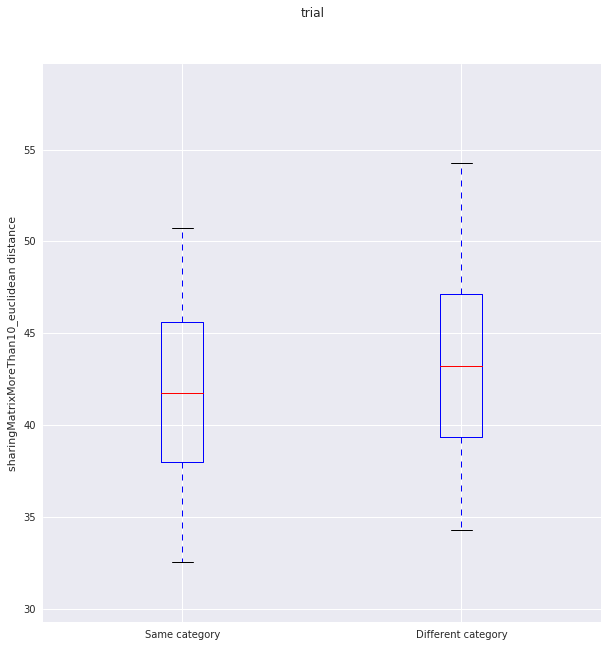

In [268]:
feature_dist_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Distance Matrices/Features/distMat_PNP434_sharingMatrixMoreThan10_euclidean'
phenotype_dist_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Distance Matrices/BinaryPhenotypes/distMat_PNP434_Taking contraceptives_euclidean'

fig2=plot_distances_for_each_group(feature_dist_file,phenotype_dist_file,filteringList)
fig2.suptitle('trial')
plt.show()

In [244]:
sigResults=permAnovaResultsFull[permAnovaResultsFull['sig. by FDR=0.01']==1]
sigResults



,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni,sig. by FDR=0.01,nSamples for variable
0,sharingMatrixMoreThan101PCsUsed_euclidean,Taking contraceptives,9999.0,True,16.144056,0.0001,1,1,45.0
1,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.224822,0.0001,1,1,81.0
2,sharingMatrixMoreThan10_euclidean,Taking contraceptives,9999.0,True,1.356359,0.0001,1,1,45.0
3,sharingMatrixMoreThan10RA_braycurtis,Gender,9999.0,True,1.174398,0.0001,1,1,155.0
4,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.069199,0.0001,1,1,81.0
5,sharingMatrixMoreThan1Binary_braycurtis,Gender,9999.0,True,1.057184,0.0001,1,1,155.0
6,sharingMatrixMoreThan1RA_braycurtis,Gender,9999.0,True,1.049352,0.0002,1,1,155.0
7,sharingMatrixMoreThan1Binary_braycurtis,No period,9999.0,True,1.066132,0.0002,1,1,81.0
8,sharingMatrixMoreThan11PCsUsed_euclidean,Taking contraceptives,9999.0,True,17.251369,0.0003,0,1,45.0


In [276]:
for n in sigResults.index:
    print n
    featureName=sigResults.loc[n,'featureName']
    phenotype=sigResults.loc[n,'phenotype']
    p=sigResults.loc[n,'p']
    nSamplesForVariable=sigResults.loc[n,'nSamples for variable']
    
    feature_dist_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Distance Matrices/Features/distMat_PNP434_%s' %featureName
    phenotype_dist_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Distance Matrices/BinaryPhenotypes/distMat_PNP434_%s_euclidean' %phenotype
    
    fig2=plot_distances_for_each_group(feature_dist_file,phenotype_dist_file,filteringList=None)
    fig2.suptitle('Distance comparison between sample pairs with identical and opposite phenotype\nPhenotype=%s,p-value=%s,samples positive for phenotype=%s' %(phenotype,p,nSamplesForVariable),fontsize=12)     
    
    figfile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permANOVA plots/%s_%s_permanovaPlot' %(featureName,phenotype)
    fig2.savefig(figfile,dpi=200)

0
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 820_820
            BD1      BD10     BD107     BD108      BD11     BD111     BD112  \
BD1    0.000000  0.004648  0.001441  0.014095  0.018709  0.005827  0.006373   
BD10   0.004648  0.000000  0.003207  0.018743  0.023357  0.001179  0.001725   
BD107  0.001441  0.003207  0.000000  0.015537  0.020150  0.004386  0.004932   
BD108  0.014095  0.018743  0.015537  0.000000  0.004613  0.019923  0.020468   
BD11   0.018709  0.023357  0.020150  0.004613  0.000000  0.024536  0.025081   

          BD113     BD118      BD12    ...        BD901     BD902     BD903  \
BD1    0.011755  0.006815  0.014673    ...     0.006907  0.010210  0.005646   
BD10   0.007107  0.002167  0.019321    ...     0.011555  0.005562  0.010294   
BD107  0.010314  0.005374  0.016114    ...     0.008348  0.008769  0.007087   
BD108  0.025850  0.020911  0.000578    ...     0.007188  0.024306  0.008450   
BD11   0.030

ks_s=0.137992892209 ks_p=0.0
t_s=-63.6232904819 t_p=0.0
3
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 803_803
            BD1      BD10     BD107     BD108      BD11     BD111     BD112  \
BD1    0.000000  0.924106  0.929009  0.927744  0.932678  0.922182  0.897416   
BD10   0.924106  0.000000  0.925740  0.940907  0.929079  0.919336  0.918605   
BD107  0.929009  0.925740  0.000000  0.937208  0.939130  0.920460  0.918755   
BD108  0.927744  0.940907  0.937208  0.000000  0.939865  0.922717  0.919260   
BD11   0.932678  0.929079  0.939130  0.939865  0.000000  0.922777  0.925564   

          BD113     BD118      BD12    ...        BD901     BD902     BD903  \
BD1    0.933267  0.929065  0.934626    ...     0.912341  0.932120  0.913304   
BD10   0.924688  0.916542  0.934877    ...     0.920438  0.933284  0.936366   
BD107  0.933321  0.922963  0.940674    ...     0.923821  0.940650  0.929265   
BD108  0.950724  0.935245  0.944119

ks_s=0.0256437276225 ks_p=1.42411139847e-23
t_s=-20.6289290952 t_p=1.99652314855e-94
6
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 803_803
            BD1      BD10     BD107     BD108      BD11     BD111     BD112  \
BD1    0.000000  0.971042  0.974660  0.974968  0.979197  0.973806  0.965818   
BD10   0.971042  0.000000  0.974558  0.980205  0.974978  0.973207  0.969188   
BD107  0.974660  0.974558  0.000000  0.981055  0.979083  0.973967  0.974160   
BD108  0.974968  0.980205  0.981055  0.000000  0.981719  0.975951  0.973827   
BD11   0.979197  0.974978  0.979083  0.981719  0.000000  0.976883  0.978413   

          BD113     BD118      BD12    ...        BD901     BD902     BD903  \
BD1    0.977734  0.977863  0.979167    ...     0.972858  0.972605  0.971212   
BD10   0.970588  0.972348  0.976319    ...     0.972821  0.972431  0.976562   
BD107  0.975115  0.974909  0.981412    ...     0.974966  0.978475  0.976507   
BD108 

ks_s=0.0813430701485 ks_p=4.77594537487e-153
t_s=-56.6027179296 t_p=0.0


In [279]:
#plot again for females only:


with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/PNPfemales','rb') as fp:
    PNPfemales=pickle.load(fp)
filteringList=PNPfemales


for n in sigResultsFemale.index:
    print n
    featureName=sigResultsFemale.loc[n,'featureName']
    phenotype=sigResultsFemale.loc[n,'phenotype']
    if phenotype!='Gender':
        print featureName
        print phenotype
        p=sigResultsFemale.loc[n,'p']
        nSamplesForVariable=sigResultsFemale.loc[n,'nSamples for variable']

        feature_dist_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Distance Matrices/Features/distMat_PNP434_%s' %featureName
        phenotype_dist_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Distance Matrices/BinaryPhenotypes/distMat_PNP434_%s_euclidean' %phenotype

        fig2=plot_distances_for_each_group(feature_dist_file,phenotype_dist_file,filteringList)
        fig2.suptitle('Distance comparison between sample pairs with identical and opposite phenotype\nFemales only! Phenotype=%s,p-value=%s,samples positive for phenotype=%s' %(phenotype,p,nSamplesForVariable))     

        figfile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permANOVAplotsFemales/%s_%s_permanovaPlot' %(featureName,phenotype)
        fig2.savefig(figfile,dpi=200)


0
sharingMatrixMoreThan1RA_braycurtis
No period
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 820_820
            BD1      BD10     BD107     BD108      BD11     BD111     BD112  \
BD1    0.000000  0.971042  0.974660  0.974968  0.979197  0.973806  0.965818   
BD10   0.971042  0.000000  0.974558  0.980205  0.974978  0.973207  0.969188   
BD107  0.974660  0.974558  0.000000  0.981055  0.979083  0.973967  0.974160   
BD108  0.974968  0.980205  0.981055  0.000000  0.981719  0.975951  0.973827   
BD11   0.979197  0.974978  0.979083  0.981719  0.000000  0.976883  0.978413   

          BD113     BD118      BD12    ...        BD901     BD902     BD903  \
BD1    0.977734  0.977863  0.979167    ...     0.972858  0.972605  0.971212   
BD10   0.970588  0.972348  0.976319    ...     0.972821  0.972431  0.976562   
BD107  0.975115  0.974909  0.981412    ...     0.974966  0.978475  0.976507   
BD108  0.983571  0.980145  0.982045    ...   

positive mean distance=0.977773604427
negative mean distance=0.968983109493
ks_s=0.0994895051274 ks_p=9.05536018592e-132
t_s=-16.7146342882 t_p=1.40661680441e-62
3
sharingMatrixMoreThan1RA_braycurtis
Regular period
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 819_819
            BD1      BD10     BD107     BD108      BD11     BD111     BD112  \
BD1    0.000000  0.971042  0.974660  0.974968  0.979197  0.973806  0.965818   
BD10   0.971042  0.000000  0.974558  0.980205  0.974978  0.973207  0.969188   
BD107  0.974660  0.974558  0.000000  0.981055  0.979083  0.973967  0.974160   
BD108  0.974968  0.980205  0.981055  0.000000  0.981719  0.975951  0.973827   
BD11   0.979197  0.974978  0.979083  0.981719  0.000000  0.976883  0.978413   

          BD113     BD118      BD12    ...        BD901     BD902     BD903  \
BD1    0.977734  0.977863  0.979167    ...     0.972858  0.972605  0.971212   
BD10   0.970588  0.972348  0.976319 

positive mean distance=0.0207159260891
negative mean distance=0.019764045831
ks_s=0.0253174322061 ks_p=4.5147784036e-09
t_s=-7.32560658287 t_p=2.40699988041e-13
6
sharingMatrixMoreThan10100PCsUsed_euclidean
Regular period
loading and processing distance matrix files...
original x array shape is 434_434
original y array shape is 819_819
            BD1      BD10     BD107     BD108      BD11     BD111     BD112  \
BD1    0.000000  1.336583  1.347342  1.074193  1.085910  1.302708  1.340855   
BD10   1.336583  0.000000  1.352504  1.135385  1.065066  1.319548  1.348429   
BD107  1.347342  1.352504  0.000000  1.095791  1.095456  1.329030  1.367337   
BD108  1.074193  1.135385  1.095791  0.000000  0.750868  1.056598  1.083040   
BD11   1.085910  1.065066  1.095456  0.750868  0.000000  1.008516  1.080970   

          BD113     BD118      BD12    ...        BD901     BD902     BD903  \
BD1    1.361058  1.347654  1.081429    ...     1.182029  1.322942  1.217269   
BD10   1.355574  1.338635  1.

positive mean distance=43.6416262537
negative mean distance=42.0182282825
ks_s=0.10431510933 ks_p=7.86059155566e-123
t_s=-36.0125804405 t_p=4.31656004138e-281


# repeat analysis with females only:


## generating lists of female and male samples:

In [163]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/fullXgroupbyBD'
fullXgroupbyBD=pd.read_pickle(file1)

In [164]:
fullXgroupbyBD.head()

,ConnectionID,ALT,AST,Albumin,BMI,BPdia,BPsys,Basophils %,Blood A,Blood B,...,Urea,WBC,WHR,Waist,Was breastfed,Work activity,YOB,Age,IsGenotek,FD
BD,,,,,,,,,,,,,,,,,,,,,
BD1,751.0,12.0,24.0,42.0,23.437500,83.0,115.0,0.5,NaN,NaN,...,NaN,6.9,0.850000,85.0,1.0,2.0,50.0,64.0,NaN,"[FD1769, FD722]"
BD10,808.0,22.0,18.0,44.0,24.655910,81.0,122.0,0.5,NaN,NaN,...,NaN,8.2,0.902913,93.0,1.0,4.0,69.0,45.0,NaN,"[FD2128, FD861]"
BD100,660.0,27.0,22.0,47.0,25.925926,94.0,139.0,0.6,NaN,NaN,...,NaN,5.9,0.950000,95.0,1.0,1.0,57.0,57.0,0.0,[FD542]
BD101,655.0,18.0,21.0,42.0,22.944089,84.0,130.0,0.5,0.0,1.0,...,NaN,6.6,0.844660,87.0,0.0,1.0,50.0,64.0,0.0,[FD757]
BD102,652.0,16.0,23.0,51.0,19.174580,63.0,97.0,0.8,NaN,NaN,...,NaN,8.1,0.779070,67.0,0.0,1.0,74.0,40.0,0.0,[FD540]


In [167]:
fullXgroupbyBD.groupby(['Gender','Taking contraceptives']).count()

ConnectionID  ALT  AST  Albumin  BMI  BPdia  \
Gender Taking contraceptives                                                
0.0    0.0                             398  396  396      396  383    391   
       1.0                              88   86   86       86   81     85   
1.0    0.0                             317  315  315      315  307    311   

                              BPsys  Basophils %  Blood A  Blood B ...   Urea  \
Gender Taking contraceptives                                       ...          
0.0    0.0                      391          393      207      207 ...      9   
       1.0                       85           87       41       41 ...      2   
1.0    0.0                      311          316      129      129 ...     10   

                              WBC  WHR  Waist  Was breastfed  Work activity  \
Gender Taking contraceptives                                                  
0.0    0.0                    393  391    383            337            377   
       1.0                     87   87     82             82             83   
1.0    0.0                    316  311    307            266            312   

                              YOB  Age  IsGenotek   FD  
Gender Taking contraceptives                            
0.0    0.0                    398  397        214  398  
       1.0                     88   88         47   88  
1.0    0.0                    317  317        173  317  

[3 rows x 79 columns]

In [173]:
Females=list(fullXgroupbyBD[fullXgroupbyBD['Gender']==0].index)
print len(Females)

486


In [170]:
Males=list(fullXgroupbyBD[fullXgroupbyBD['Gender']==1].index)
print len(Males)

317


In [175]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/PNPfemales','wb') as fp:
    pickle.dump(Females,fp)

In [176]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/PNPmales','wb') as fp:
    pickle.dump(Males,fp)

## repeat analysis with females only:

### run  with 9999 permutations in eclipse - filteringList=PNPfemales:
several features were dropped due to redundency shown with 999 permutations:
distMat_PNP434_sharingMatrixMoreThan1RAlog2scale_euclidean','distMat_PNP434_sharingMatrixMoreThan2_euclidean','distMat_PNP434_sharingMatrixMoreThan2RA_braycurtis',      'distMat_PNP434_sharingMatrixMoreThan5_euclidean','distMat_PNP434_sharingMatrixMoreThan5RA_braycurtis'

In [178]:
# Now I used 18 phenotypes (remove isPregnant and Home delivery due to low positive samples) and 13 out of the 18 features
#so there are going to be 234 tests and the desired p-value 0.00021
#therefore 9999 permutation should be enought
# 18*13
0.05/(18*13)
# 1.0/9999

0.00021367521367521368

### watch results:

In [212]:
permAnovaFolder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResults_FemalesOnly'
permAnovaResultsFemales=concat_summarizing_dfs(permAnovaFolder)

number of dfs in directory: 221
the length of df list is 221


In [213]:
permAnovaResultsFemales.sort_values(by='p')

,featureName,phenotype,nPerm,removeSameUser,s,p
0,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.073622,0.0001
0,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.225403,0.0001
0,sharingMatrixMoreThan1Binary_braycurtis,No period,9999.0,True,1.063793,0.0002
0,sharingMatrixMoreThan1RA_braycurtis,Regular period,9999.0,True,1.045249,0.0004
0,sharingMatrixMoreThan101PCsUsed_euclidean,No period,9999.0,True,12.349492,0.0005
0,sharingMatrixMoreThan101PCsUsed_euclidean,Past breastfeeding,9999.0,True,11.740758,0.0006
0,sharingMatrixMoreThan10100PCsUsed_euclidean,Regular period,9999.0,True,1.275060,0.0006
0,sharingMatrixMoreThan11PCsUsed_euclidean,Past breastfeeding,9999.0,True,10.246009,0.0007
0,sharingMatrixMoreThan10_euclidean,Taking contraceptives,9999.0,True,1.258421,0.0007
0,sharingMatrixMoreThan1Binary_braycurtis,Regular period,9999.0,True,1.046228,0.0010


In [216]:
permAnovaResultsFemales[permAnovaResultsFemales['phenotype']=='Gender']

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni


#### add indication for significance by bonferroni:

In [217]:
permAnovaResultsFemales['sig by bonferroni']=np.where(permAnovaResultsFemales['p']<(0.05/234),1,0)
permAnovaResultsFemales=permAnovaResultsFemales.sort_values(by='p')
permAnovaResultsFemales.head()

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni
0,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.073622,0.0001,1
0,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.225403,0.0001,1
0,sharingMatrixMoreThan1Binary_braycurtis,No period,9999.0,True,1.063793,0.0002,1
0,sharingMatrixMoreThan1RA_braycurtis,Regular period,9999.0,True,1.045249,0.0004,0
0,sharingMatrixMoreThan101PCsUsed_euclidean,No period,9999.0,True,12.349492,0.0005,0


#### add columns to indicate significant p's after BH FDR correction with FDR=0.005:

In [218]:
print len(permAnovaResultsFemales[permAnovaResultsFemales['p']<0.05])

39


In [219]:
1.0/39

0.02564102564102564

In [220]:
from statsmodels.sandbox.stats.multicomp import fdrcorrection0
pList=permAnovaResultsFemales['p']
b,p=fdrcorrection0(pList, alpha=0.02)
sigList=[1 if x else 0 for x in b]
permAnovaResultsFemales['sig. by FDR=0.02']=sigList
permAnovaResultsFemales.head()

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni,sig. by FDR=0.02
0,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.073622,0.0001,1,1
0,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.225403,0.0001,1,1
0,sharingMatrixMoreThan1Binary_braycurtis,No period,9999.0,True,1.063793,0.0002,1,1
0,sharingMatrixMoreThan1RA_braycurtis,Regular period,9999.0,True,1.045249,0.0004,0,1
0,sharingMatrixMoreThan101PCsUsed_euclidean,No period,9999.0,True,12.349492,0.0005,0,1


#### add number of positive samples for the variable:

In [221]:
nSamplesDF=pd.DataFrame()
for n,phenotype in enumerate(binaryVariableList):        
#     print n,var
    nSamplesDF.loc[n,'phenotype']=phenotype
    if phenotype=='Is pregnant':
        nSamplesDF.loc[n,'nSamples for variable']=0
    else:
        nSamplesDF.loc[n,'nSamples for variable']=fullXgroupbyBD_only434.groupby(phenotype).count().iloc[1,0]
nSamplesDF.head()   

,phenotype,nSamples for variable
0,Blood A,71.0
1,Blood B,43.0
2,Blood RH-,32.0
3,C-Section,28.0
4,Currently smokes,45.0


#### check association between nSamples for variable and significant results:

In [185]:
nSamplesDF

,phenotype,nSamples for variable
0,Blood A,71.0
1,Blood B,43.0
2,Blood RH-,32.0
3,C-Section,28.0
4,Currently smokes,45.0
5,Ever smoked,156.0
6,Gender,155.0
7,Hormonal replacment,14.0
8,Irregular period,25.0
9,Is after birth,19.0


In [186]:
sigCategories=['Gender','No period','Taking contraceptives','Past breastfeeding','Regular period']
VerySigCategories=['Gender','No period','Taking contraceptives']

In [188]:
sig=[nSamplesDF.loc[n,'nSamples for variable'] for n in nSamplesDF.index if nSamplesDF.loc[n,'phenotype'] in sigCategories]
notSig=[nSamplesDF.loc[n,'nSamples for variable'] for n in nSamplesDF.index if nSamplesDF.loc[n,'phenotype'] not in sigCategories]

In [189]:
print len(sig)
print len(notSig)

5
13


In [192]:
print np.mean(sig)
print np.mean(notSig)

107.0
76.4615384615


In [191]:
ks_s,ks_p=stats.ks_2samp(sig,notSig)
print 'ks_s=%s ks_p=%s' %(ks_s,ks_p)
t_s,t_p=stats.ttest_ind(sig,notSig)
print 't_s=%s t_p=%s' %(t_s,t_p)

ks_s=0.615384615385 ks_p=0.0759279813009
t_s=0.712588337304 t_p=0.486363399789


In [197]:
VerySig=[nSamplesDF.loc[n,'nSamples for variable'] for n in nSamplesDF.index if nSamplesDF.loc[n,'phenotype'] in VerySigCategories]
notVerySig=[nSamplesDF.loc[n,'nSamples for variable'] for n in nSamplesDF.index if nSamplesDF.loc[n,'phenotype'] not in VerySigCategories]

In [198]:
print len(VerySig)
print len(notVerySig)

3
15


In [199]:
print np.mean(VerySig)
print np.mean(notVerySig)

93.6666666667
83.2


In [200]:
ks_s,ks_p=stats.ks_2samp(VerySig,notVerySig)
print 'ks_s=%s ks_p=%s' %(ks_s,ks_p)
t_s,t_p=stats.ttest_ind(VerySig,notVerySig)
print 't_s=%s t_p=%s' %(t_s,t_p)

ks_s=0.533333333333 ks_p=0.334437123218
t_s=0.200312956654 t_p=0.843759787704


In [223]:
permAnovaResultsFemalesFull=pd.merge(permAnovaResultsFemales,nSamplesDF,how='left',left_on='phenotype',right_on='phenotype')
permAnovaResultsFemalesFull

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni,sig. by FDR=0.02,nSamples for variable
0,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.073622,0.0001,1,1,81.0
1,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.225403,0.0001,1,1,81.0
2,sharingMatrixMoreThan1Binary_braycurtis,No period,9999.0,True,1.063793,0.0002,1,1,81.0
3,sharingMatrixMoreThan1RA_braycurtis,Regular period,9999.0,True,1.045249,0.0004,0,1,125.0
4,sharingMatrixMoreThan101PCsUsed_euclidean,No period,9999.0,True,12.349492,0.0005,0,1,81.0
5,sharingMatrixMoreThan101PCsUsed_euclidean,Past breastfeeding,9999.0,True,11.740758,0.0006,0,1,129.0
6,sharingMatrixMoreThan10100PCsUsed_euclidean,Regular period,9999.0,True,1.275060,0.0006,0,1,125.0
7,sharingMatrixMoreThan11PCsUsed_euclidean,Past breastfeeding,9999.0,True,10.246009,0.0007,0,1,129.0
8,sharingMatrixMoreThan10_euclidean,Taking contraceptives,9999.0,True,1.258421,0.0007,0,1,45.0
9,sharingMatrixMoreThan1Binary_braycurtis,Regular period,9999.0,True,1.046228,0.0010,0,0,125.0


In [278]:
sigResultsFemale=permAnovaResultsFemalesFull[permAnovaResultsFemalesFull['sig. by FDR=0.02']==1]
sigResultsFemale

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni,sig. by FDR=0.02,nSamples for variable
0,sharingMatrixMoreThan1RA_braycurtis,No period,9999.0,True,1.073622,0.0001,1,1,81.0
1,sharingMatrixMoreThan10RA_braycurtis,No period,9999.0,True,1.225403,0.0001,1,1,81.0
2,sharingMatrixMoreThan1Binary_braycurtis,No period,9999.0,True,1.063793,0.0002,1,1,81.0
3,sharingMatrixMoreThan1RA_braycurtis,Regular period,9999.0,True,1.045249,0.0004,0,1,125.0
4,sharingMatrixMoreThan101PCsUsed_euclidean,No period,9999.0,True,12.349492,0.0005,0,1,81.0
5,sharingMatrixMoreThan101PCsUsed_euclidean,Past breastfeeding,9999.0,True,11.740758,0.0006,0,1,129.0
6,sharingMatrixMoreThan10100PCsUsed_euclidean,Regular period,9999.0,True,1.275060,0.0006,0,1,125.0
7,sharingMatrixMoreThan11PCsUsed_euclidean,Past breastfeeding,9999.0,True,10.246009,0.0007,0,1,129.0
8,sharingMatrixMoreThan10_euclidean,Taking contraceptives,9999.0,True,1.258421,0.0007,0,1,45.0


#### save files:

In [224]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResultsFemalesFull'
permAnovaResultsFemalesFull.to_pickle(file1)

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResultsFemalestsFull.xlsx'
permAnovaResultsFemalesFull.to_excel(file1)

### check if the results might be an effect of age:

In [225]:
fullXgroupbyBD_only434.head()

,ConnectionID,ALT,AST,Albumin,BMI,BPdia,BPsys,Basophils %,Blood A,Blood B,...,Urea,WBC,WHR,Waist,Was breastfed,Work activity,YOB,Age,IsGenotek,FD
BD,,,,,,,,,,,,,,,,,,,,,
BD438,1128.0,12.0,16.0,45.00,24.740937,68.0,118.0,0.60,NaN,NaN,...,NaN,8.00,NaN,80.0,1.0,4.0,71.0,44.0,NaN,"[FD1278, FD1682]"
BD690,661.0,15.0,15.0,4.80,27.141582,68.0,114.0,0.10,NaN,NaN,...,NaN,8.50,0.922330,95.0,1.0,1.0,49.0,65.0,NaN,"[FD2022, FD585]"
BD836,1333.4,119.2,364.2,4.62,23.245985,68.8,117.0,0.28,0.0,0.0,...,20.22,6.52,0.827129,83.2,1.0,1.0,79.0,37.0,0.0,"[FD1498, FD1499, FD1612, FD1561, FD1567]"
BD701,713.0,10.0,16.0,4.60,22.313278,76.0,113.0,1.00,1.0,0.0,...,NaN,7.20,0.780220,71.0,1.0,1.0,84.0,30.0,NaN,"[FD2222, FD609]"
BD443,1141.0,12.0,20.0,44.00,25.847768,64.0,108.0,0.70,NaN,NaN,...,NaN,6.90,0.777778,77.0,1.0,1.0,71.0,44.0,NaN,"[FD1289, FD2009]"


In [226]:
fullXgroupbyBD_only434.groupby(['Gender','No period']).mean()['Age']

Gender  No period
0.0     0.0          36.988166
        1.0          57.641975
1.0     0.0          41.483871
Name: Age, dtype: float64

In [227]:
fullXgroupbyBD_only434.groupby(['Gender','Regular period']).mean()['Age']

Gender  Regular period
0.0     0.0               50.015504
        1.0               36.925620
1.0     0.0               41.086093
        1.0               56.500000
Name: Age, dtype: float64

In [228]:
fullXgroupbyBD_only434.groupby(['Gender','Regular period']).count()['Age']

Gender  Regular period
0.0     0.0               129
        1.0               121
1.0     0.0               151
        1.0                 4
Name: Age, dtype: int64

In [229]:
fullXgroupbyBD_only434.groupby(['Gender','Past breastfeeding']).mean()['Age']


Gender  Past breastfeeding
0.0     0.0                   37.570248
        1.0                   49.410853
1.0     0.0                   41.483871
Name: Age, dtype: float64

In [230]:
fullXgroupbyBD_only434.groupby(['Gender','Taking contraceptives']).mean()['Age']

Gender  Taking contraceptives
0.0     0.0                      46.424390
        1.0                      31.177778
1.0     0.0                      41.483871
Name: Age, dtype: float64

In [230]:
fullXgroupbyBD_only434.groupby(['Gender','Taking contraceptives']).mean()['Age']

Gender  Taking contraceptives
0.0     0.0                      46.424390
        1.0                      31.177778
1.0     0.0                      41.483871
Name: Age, dtype: float64

In [311]:
fullXgroupbyBD_only434.groupby(['Gender','Currently smokes']).mean()['Age']

Gender  Currently smokes
0.0     0.0                 44.193833
        1.0                 38.608696
1.0     0.0                 42.075188
        1.0                 37.909091
Name: Age, dtype: float64

In [314]:
fullXgroupbyBD_only434.groupby(['Gender','Regular defecation']).mean()['Age']

Gender  Regular defecation
0.0     0.0                   42.490196
        1.0                   44.500000
1.0     0.0                   40.104167
        1.0                   41.962264
Name: Age, dtype: float64

In [312]:
groups=fullXgroupbyBD_only434.groupby('Gender')
df=pd.DataFrame()
for name,group in groups:
    df[name]=group['Currently smokes'].value_counts()

print df

     0.0  1.0
0.0  227  133
1.0   23   22


In [313]:
groups=fullXgroupbyBD_only434.groupby('Gender')
df=pd.DataFrame()
for name,group in groups:
    df[name]=group['Regular defecation'].value_counts()

print df

     0.0  1.0
1.0  148  106
0.0  102   48


## repeat analysis for new features with females only:

### run  with 9999 permutations in eclipse - filteringList=PNPfemales:


In [11]:
0.05/2193


2.2799817601459188e-05

In [12]:
# Now I used 17 phenotypes (removed isPregnant and Home delivery due to low positive samples and 
#removed gender) and 129 new features
#so there are going to be 2193 tests and the desired p-value 2.3*10-5
#therefore 9999 permutation AREN'T enought (1*10-4)


### watch results:

In [56]:
permAnovaFolder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResults_FemalesOnly_newfeatures'
permAnovaResultsFemalesNew=concat_summarizing_dfs(permAnovaFolder)

number of dfs in directory: 2278
the length of df list is 2278


In [57]:
permAnovaResultsFemalesNew.sort_values(by='p')

,featureName,phenotype,nPerm,removeSameUser,s,p
0,d3Deletion_max_T_euclidean,IsGenotek,9999.0,True,NaN,0.0001
0,d3Deletion_max_T_euclidean,Blood RH-,9999.0,True,NaN,0.0001
0,d5Deletion_max_T_euclidean,Is after birth,9999.0,True,NaN,0.0001
0,V05_J01_T_euclidean,No period,9999.0,True,2.889194e+01,0.0001
0,d5Deletion_max_T_euclidean,IsGenotek,9999.0,True,NaN,0.0001
0,d5Deletion_max_T_euclidean,Taking contraceptives,9999.0,True,NaN,0.0001
0,d5Deletion_max_T_euclidean,No period,9999.0,True,NaN,0.0001
0,d3Deletion_max_T_euclidean,Blood A,9999.0,True,NaN,0.0001
0,d5Deletion_max_T_euclidean,Is breastfeeding,9999.0,True,NaN,0.0001
0,d3Deletion_max_T_euclidean,Past breastfeeding,9999.0,True,NaN,0.0001


In [48]:
permAnovaResultsFemalesNew[permAnovaResultsFemalesNew['phenotype']=='Gender']

,featureName,phenotype,nPerm,removeSameUser,s,p


#### add indication for significance by bonferroni:

In [49]:
permAnovaResultsFemalesNew['sig by bonferroni']=np.where(permAnovaResultsFemalesNew['p']<(0.05/2193),1,0)
permAnovaResultsFemalesNew=permAnovaResultsFemalesNew.sort_values(by='p')
permAnovaResultsFemalesNew.head()

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni
0,d5Deletion_max_T_euclidean,Was breastfed,9999.0,True,NaN,0.0001,0
0,d5Deletion_max_T_euclidean,Blood RH-,9999.0,True,NaN,0.0001,0
0,d5Deletion_max_T_euclidean,Currently smokes,9999.0,True,NaN,0.0001,0
0,d5Deletion_max_T_euclidean,Hormonal replacment,9999.0,True,NaN,0.0001,0
0,V06_J02_T_euclidean,Regular period,9999.0,True,18.487917,0.0001,0


#### add columns to indicate significant p's after BH FDR correction with FDR=0.005:

In [50]:
print len(permAnovaResultsFemalesNew[permAnovaResultsFemalesNew['p']<0.05])

132


In [51]:
1.0/130

0.007692307692307693

In [52]:
from statsmodels.sandbox.stats.multicomp import fdrcorrection0
pList=permAnovaResultsFemalesNew['p']
b,p=fdrcorrection0(pList, alpha=0.005)
sigList=[1 if x else 0 for x in b]
permAnovaResultsFemalesNew['sig. by FDR=0.005']=sigList
permAnovaResultsFemalesNew.head()

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni,sig. by FDR=0.005
0,d5Deletion_max_T_euclidean,Was breastfed,9999.0,True,NaN,0.0001,0,0
0,d5Deletion_max_T_euclidean,Blood RH-,9999.0,True,NaN,0.0001,0,0
0,d5Deletion_max_T_euclidean,Currently smokes,9999.0,True,NaN,0.0001,0,0
0,d5Deletion_max_T_euclidean,Hormonal replacment,9999.0,True,NaN,0.0001,0,0
0,V06_J02_T_euclidean,Regular period,9999.0,True,18.487917,0.0001,0,0


#### add number of positive samples for the variable:

In [53]:
nSamplesDF=pd.DataFrame()
for n,phenotype in enumerate(binaryVariableList):        
#     print n,var
    nSamplesDF.loc[n,'phenotype']=phenotype
    if phenotype=='Is pregnant':
        nSamplesDF.loc[n,'nSamples for variable']=0
    else:
        nSamplesDF.loc[n,'nSamples for variable']=fullXgroupbyBD_only434.groupby(phenotype).count().iloc[1,0]
nSamplesDF.head()   

,phenotype,nSamples for variable
0,Blood A,71.0
1,Blood B,43.0
2,Blood RH-,32.0
3,C-Section,28.0
4,Currently smokes,45.0


In [54]:
permAnovaResultsFemalesFullNew=pd.merge(permAnovaResultsFemalesNew,nSamplesDF,how='left',left_on='phenotype',right_on='phenotype')
permAnovaResultsFemalesFullNew

,featureName,phenotype,nPerm,removeSameUser,s,p,sig by bonferroni,sig. by FDR=0.005,nSamples for variable
0,d5Deletion_max_T_euclidean,Was breastfed,9999.0,True,NaN,0.0001,0,0,270.0
1,d5Deletion_max_T_euclidean,Blood RH-,9999.0,True,NaN,0.0001,0,0,32.0
2,d5Deletion_max_T_euclidean,Currently smokes,9999.0,True,NaN,0.0001,0,0,45.0
3,d5Deletion_max_T_euclidean,Hormonal replacment,9999.0,True,NaN,0.0001,0,0,14.0
4,V06_J02_T_euclidean,Regular period,9999.0,True,18.487917,0.0001,0,0,125.0
5,d5Deletion_max_T_euclidean,Ever smoked,9999.0,True,NaN,0.0001,0,0,156.0
6,d5Deletion_max_T_euclidean,Regular defecation,9999.0,True,NaN,0.0001,0,0,254.0
7,usageFeatures_euclidean,No period,9999.0,True,10.171227,0.0001,0,0,81.0
8,d5Deletion_max_T_euclidean,Regular period,9999.0,True,NaN,0.0001,0,0,125.0
9,d5Deletion_max_T_euclidean,No period,9999.0,True,NaN,0.0001,0,0,81.0


#### save files:

In [55]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResultsFemalesFullNew'
permAnovaResultsFemalesFullNew.to_pickle(file1)

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PhenotypicData/permAnovaResultsFemalesFullNew.xlsx'
permAnovaResultsFemalesFullNew.to_excel(file1)